
####  PROYECTO EN FLASK:
####  En el siguiente url se encuentra la app ejecutandose en Railway
https://26bwebappflask-production.up.railway.app/

##### La aplicacion que voy a usar para la tarea de Flask consiste en el modelado de uno de los indicDORES de las Redes de Telefonia, este KPI es el "MOS"

##### El MOS es una caracteristica que resulta de la apreciacion del usuario.  MOS significa (Mean Opinion Score) y es una métrica que evalúa la calidad subjetiva de la voz en las llamadas.  Esta va de 1 a 5.

##### En las pruebas de Campo, un Drive test, se necesita que dos Moviles interactuen y a través de una llamada entre ambos moviles y un audio que se reproduce, se obtiene un una medida de MOS en funcion de la comprarcion entre el audio reproducido y el audio escuchado y grabadoo por el movil.

#####  La idea es crear un modelo que en funcion a las estadisticas recolectadas en un punto, poder predecir el MOS en WCDMA en una ubicación.




In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd



2025-08-14 17:49:49.098123: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-14 17:50:08.431073: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/vscode/.local/lib/python3.11/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime ve

In [2]:
mos_csv = pd.read_csv("./wcdma_DataEntre.csv")
mos_csv.head()

,log_hash,time,posid,seqid,wcdma_aset_ecio_avg,wcdma_aset_rscp_avg,wcdma_txagc,wcdma_bler_average_percent_all_channels,wcdma_rssi,gsm_speechcodecrx,mos,wav_silent_percent
0,326425006476197621,2019-05-07 12:00:44,7833.0,3756532.0,-4.106082,-63.318151,-28.260111,0.0,-59.212069,4.5,4.1605,NaN
1,326425006476197621,2019-05-07 12:00:52,7841.0,3760832.0,-4.854717,-63.188050,-27.902778,0.0,-58.333333,4.5,4.1033,NaN
2,326425006476197621,2019-05-07 12:01:05,7855.0,3767843.0,-4.376622,-63.153288,-27.640286,0.0,-58.776667,4.5,4.1652,NaN
3,326425006476197621,2019-05-07 12:01:18,7867.0,3774930.0,-4.460372,-62.534510,-29.934706,0.0,-58.074138,4.5,4.1988,NaN
4,326425006476283968,2019-05-08 12:01:52,7952.0,2368034.0,-11.586009,-94.182500,6.421125,0.0,-82.596491,4.5,4.1442,56.248712


In [3]:
mos_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6022 entries, 0 to 6021
Data columns (total 12 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   log_hash                                 6022 non-null   int64  
 1   time                                     6022 non-null   object 
 2   posid                                    3270 non-null   float64
 3   seqid                                    3270 non-null   float64
 4   wcdma_aset_ecio_avg                      6022 non-null   float64
 5   wcdma_aset_rscp_avg                      6022 non-null   float64
 6   wcdma_txagc                              6022 non-null   float64
 7   wcdma_bler_average_percent_all_channels  6022 non-null   float64
 8   wcdma_rssi                               6022 non-null   float64
 9   gsm_speechcodecrx                        6022 non-null   float64
 10  mos                                      6022 no

In [4]:
total_data = mos_csv.copy()

In [5]:
total_data = total_data.drop(['log_hash', 'time', 'posid', 'seqid', 'wav_silent_percent'],axis=1)

In [6]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6022 entries, 0 to 6021
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   wcdma_aset_ecio_avg                      6022 non-null   float64
 1   wcdma_aset_rscp_avg                      6022 non-null   float64
 2   wcdma_txagc                              6022 non-null   float64
 3   wcdma_bler_average_percent_all_channels  6022 non-null   float64
 4   wcdma_rssi                               6022 non-null   float64
 5   gsm_speechcodecrx                        6022 non-null   float64
 6   mos                                      6022 non-null   float64
dtypes: float64(7)
memory usage: 329.5 KB


In [7]:
#===============================================================================
#                      Mi Script Para El Split
#===============================================================================

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # Crear el escalador
X = total_data.drop(columns=["mos"])
y = total_data["mos"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

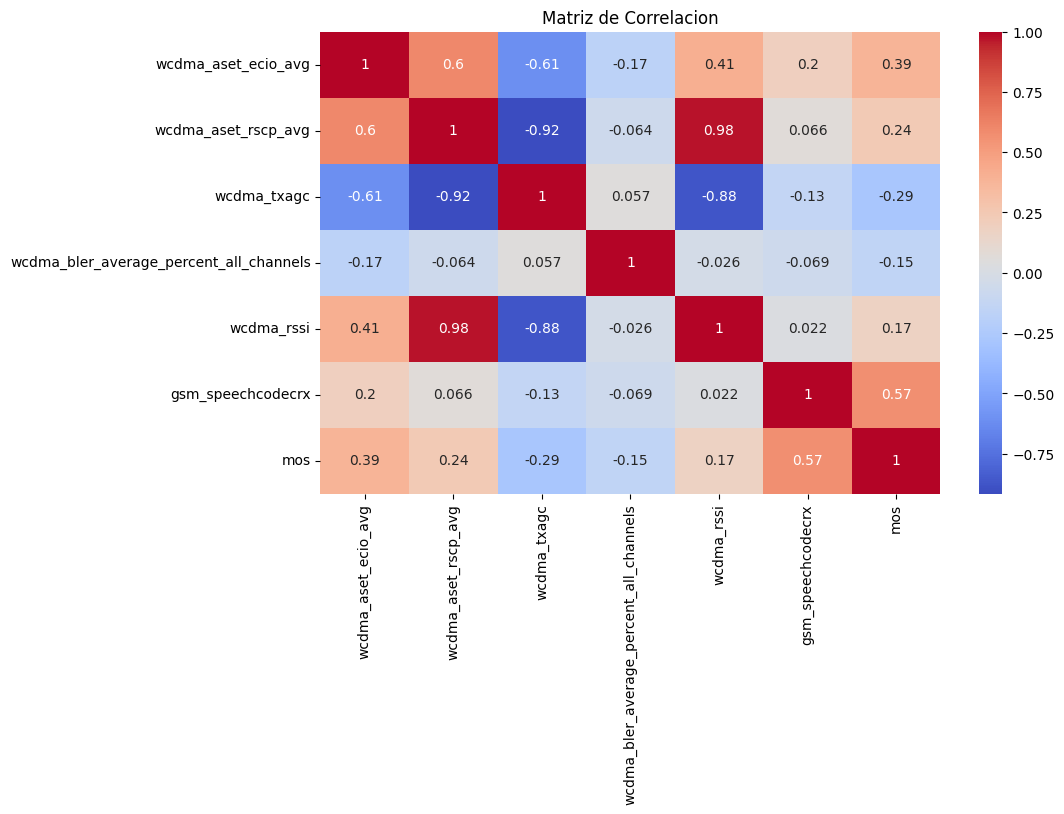

In [8]:
#Correlaciones
plt.figure(figsize=(10, 6))
sns.heatmap(total_data.corr(), annot=True, cmap='coolwarm')# sirve para ver la correlacion entre variables.
plt.title("Matriz de Correlacion")
plt.show()

In [33]:
from sklearn.ensemble import RandomForestRegressor

model_01a = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)




model_01a.fit(X_train, y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,10
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [34]:
# Ver resultados de Precision
y_pred = model_01a.predict(X_test)


In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model_01a.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

MAE: 0.24715459254038208
MSE: 0.14001635859779543
RMSE: 0.37418759813467284
R2: 0.53926469851117


Guardar Modelo

In [36]:
import joblib

joblib.dump(model_01a, '../models/modelo_randon_forest_200_10_5_2.pkl')

['../models/modelo_randon_forest_200_10_5_2.pkl']

In [37]:
valores_unicos = total_data["gsm_speechcodecrx"].unique()
print(valores_unicos)

[4.5  4.41 4.16 3.95 4.36 4.53]
